In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
company=pd.read_csv(r"C:\Users\AJAY\Downloads\Company_Data.csv")

In [3]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
company.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [9]:

company.corr()
company.corr().to_csv("Dtree.csv")


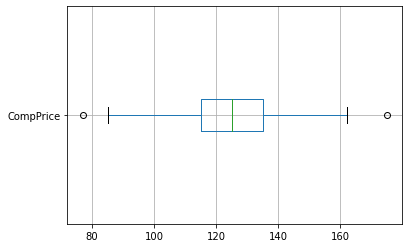

In [12]:
company.boxplot("CompPrice",vert=False)
Q1=np.percentile(company["CompPrice"],25)
Q3=np.percentile(company["CompPrice"],75)
IQR=Q3-Q1
LW=Q1-(1.5*IQR)
UW=Q3+(1.5*IQR)
company[company["CompPrice"]<LW].shape
company[company["CompPrice"]>UW].shape
company["CompPrice"]=np.where(company["CompPrice"]>UW,UW,np.where(company["CompPrice"]<LW,LW,company["CompPrice"]))


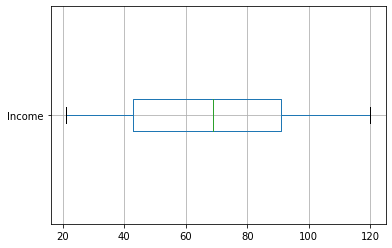

In [13]:
company.boxplot("Income",vert=False)
Q1=np.percentile(company["Income"],25)
Q3=np.percentile(company["Income"],75)
IQR=Q3-Q1
LW=Q1-(1.5*IQR)
UW=Q3+(1.5*IQR)
company[company["Income"]<LW].shape
company[company["Income"]>UW].shape
company["Income"]=np.where(company["Income"]>UW,UW,np.where(company["Income"]<LW,LW,company["Income"]))

<AxesSubplot:>

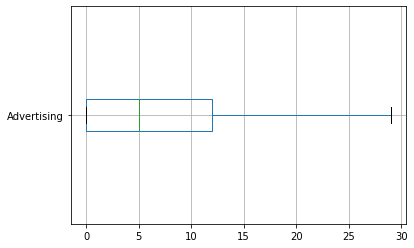

In [14]:
company.boxplot("Advertising",vert=False)

<AxesSubplot:>

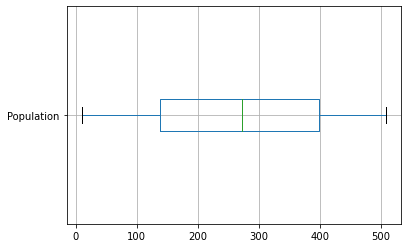

In [15]:
company.boxplot("Population",vert=False)

<AxesSubplot:>

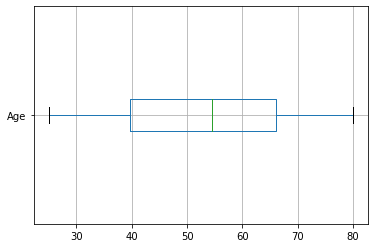

In [16]:
company.boxplot("Age",vert=False)

<AxesSubplot:>

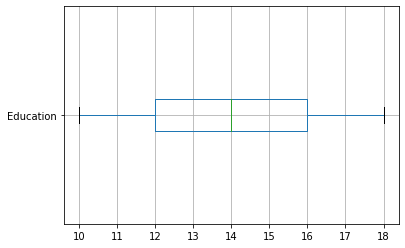

In [17]:
company.boxplot("Education",vert=False)

<AxesSubplot:>

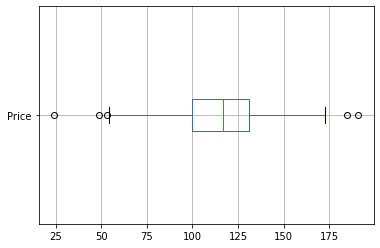

In [18]:
company.boxplot("Price",vert=False)

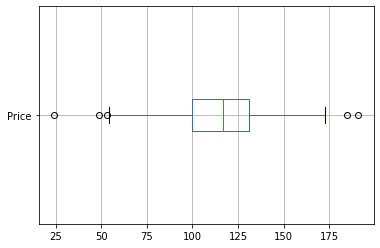

In [19]:
company.boxplot("Price",vert=False)
Q1=np.percentile(company["Price"],25)
Q3=np.percentile(company["Price"],75)
IQR=Q3-Q1
LW=Q1-(1.5*IQR)
UW=Q3+(1.5*IQR)
company[company["Price"]<LW].shape
company[company["Price"]>UW].shape
company["Price"]=np.where(company["Price"]>UW,UW,np.where(company["Price"]<LW,LW,company["Price"]))

In [20]:
company["Sales"]=pd.cut(company["Sales"],bins=[0,4.2,8.01,12.01,16.27],labels=["poor","good","very good","excellent"])
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,very good,138.0,73.0,11,276,120.0,Bad,42,17,Yes,Yes
1,very good,111.0,48.0,16,260,83.0,Good,65,10,Yes,Yes
2,very good,113.0,35.0,10,269,80.0,Medium,59,12,Yes,Yes
3,good,117.0,100.0,4,466,97.0,Medium,55,14,Yes,Yes
4,poor,141.0,64.0,3,340,128.0,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,excellent,138.0,108.0,17,203,128.0,Good,33,14,Yes,Yes
396,good,139.0,23.0,3,37,120.0,Medium,55,11,No,Yes
397,good,162.0,26.0,12,368,159.0,Medium,40,18,Yes,Yes
398,good,100.0,79.0,7,284,95.0,Bad,50,12,Yes,Yes


In [22]:
Y=company["Sales"]
X=company.iloc[:,1:]
X.columns
X.dtypes

CompPrice      float64
Income         float64
Advertising      int64
Population       int64
Price          float64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [29]:
LE=LabelEncoder()
MM=MinMaxScaler()
X["CompPrice"]=MM.fit_transform(X[["CompPrice"]])

X["Income"]=MM.fit_transform(X[["Income"]])

X["Advertising"]=MM.fit_transform(X[["Advertising"]])

X["Population"]=MM.fit_transform(X[["Population"]])

X["Price"]=MM.fit_transform(X[["Price"]])

X["Age"]=MM.fit_transform(X[["Age"]])

X["Education"]=MM.fit_transform(X[["Education"]])

X["ShelveLoc"]=LE.fit_transform(X["ShelveLoc"])
X["ShelveLoc"]=pd.DataFrame(X["ShelveLoc"])

X["Urban"]=LE.fit_transform(X["Urban"])
X["Urban"]=pd.DataFrame(X["Urban"])

X["US"]=LE.fit_transform(X["US"])
X["US"]=pd.DataFrame(X["US"])
X

Y=LE.fit_transform(company["Sales"])
Y=pd.DataFrame(Y)

In [30]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.6625,0.525253,0.379310,0.533066,0.536290,0,0.309091,0.875,1,1
1,0.3250,0.272727,0.551724,0.501002,0.237903,1,0.727273,0.000,1,1
2,0.3500,0.141414,0.344828,0.519038,0.213710,2,0.618182,0.250,1,1
3,0.4000,0.797980,0.137931,0.913828,0.350806,2,0.545455,0.500,1,1
4,0.7000,0.434343,0.103448,0.661323,0.600806,0,0.236364,0.375,1,0
...,...,...,...,...,...,...,...,...,...,...
395,0.6625,0.878788,0.586207,0.386774,0.600806,1,0.145455,0.500,1,1
396,0.6750,0.020202,0.103448,0.054108,0.536290,2,0.545455,0.125,0,1
397,0.9625,0.050505,0.413793,0.717435,0.850806,2,0.272727,1.000,1,1
398,0.1875,0.585859,0.241379,0.549098,0.334677,0,0.454545,0.250,1,1


In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=1)

In [32]:
dt=DecisionTreeClassifier(criterion='entropy')

In [38]:
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

print(classification_report(ytest,ypred))


              precision    recall  f1-score   support

           0       0.67      0.22      0.33         9
           1       0.59      0.58      0.58        57
           2       0.26      0.38      0.31        13
           3       0.55      0.57      0.56        40
           4       0.00      0.00      0.00         1

    accuracy                           0.53       120
   macro avg       0.41      0.35      0.36       120
weighted avg       0.54      0.53      0.52       120



In [36]:
print('Training accuracy:',dt.score(xtrain,ytrain))
print('Testing Accuracy:',dt.score(xtest,ytest))

Training accuracy: 1.0
Testing Accuracy: 0.5583333333333333


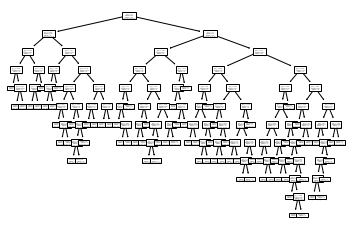

In [40]:
tree.plot_tree(dt)
plt.show()

In [90]:
plt.rcParams['figure.figsize']=(16,8)
plt.rcParams['figure.dpi']=250

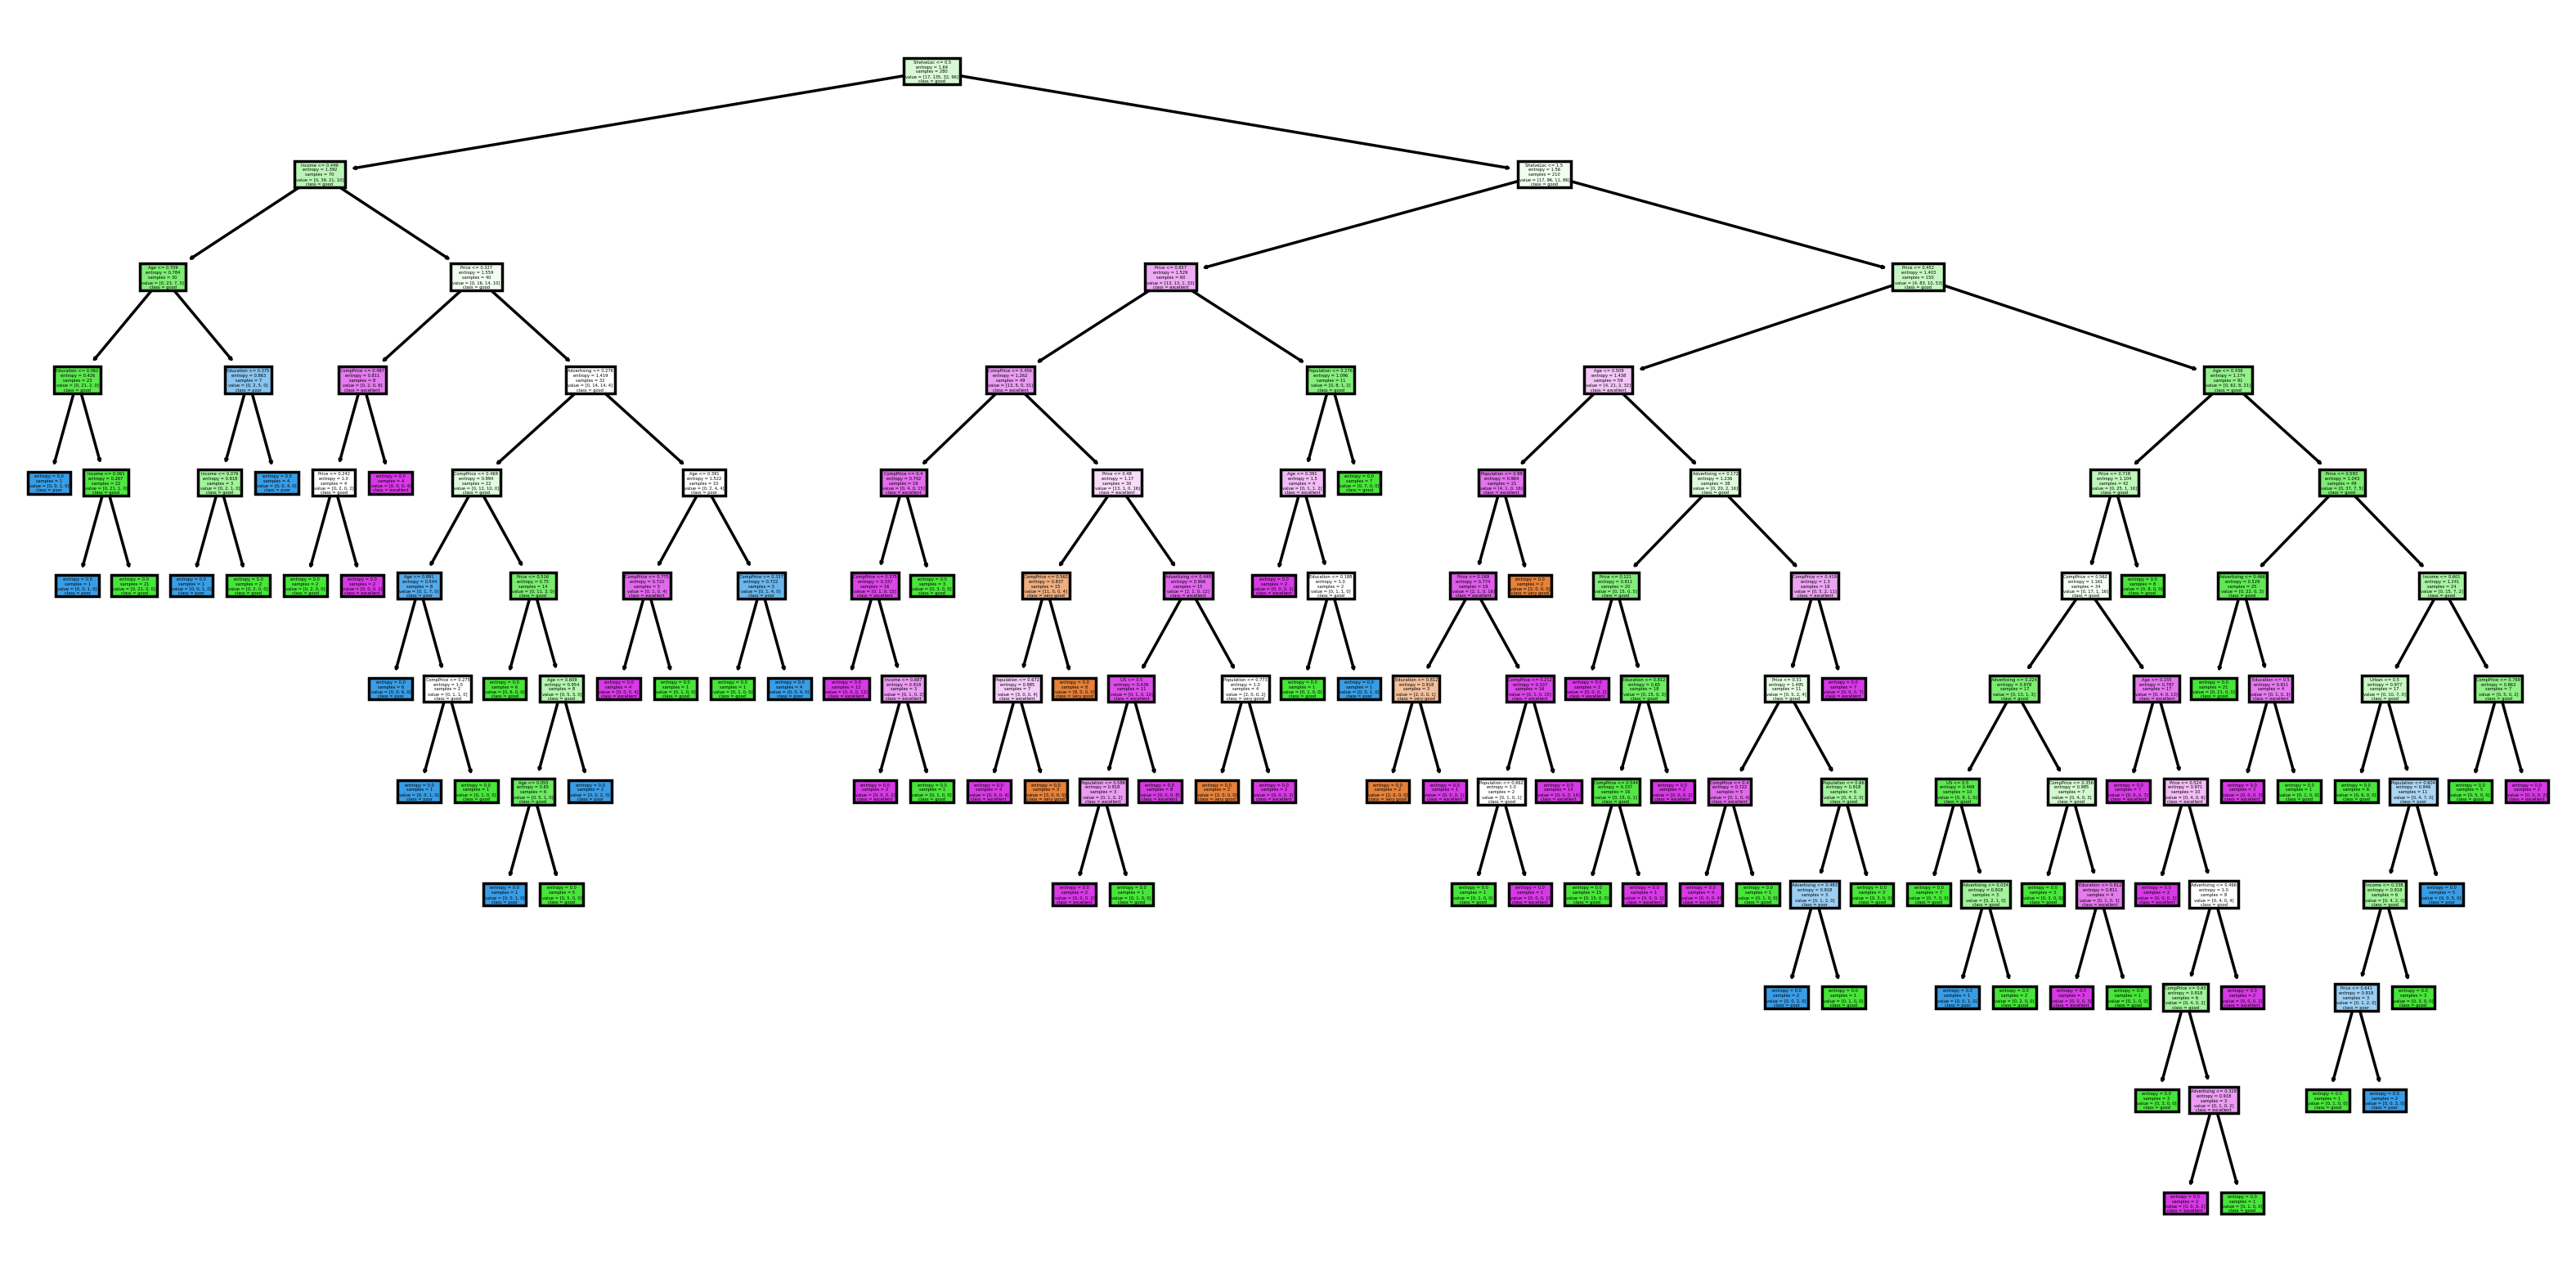

In [91]:
 tree.plot_tree(dt,feature_names=X.columns,
              class_names=company['Sales'].unique(),
              filled=True)
plt.show()


In [45]:
dt.feature_importances_

array([0.19521405, 0.07154575, 0.10061465, 0.07596194, 0.21943545,
       0.12977801, 0.13123102, 0.05394387, 0.0135323 , 0.00874297])

In [46]:
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.6625,0.525253,0.379310,0.533066,0.536290,0,0.309091,0.875,1,1
1,0.3250,0.272727,0.551724,0.501002,0.237903,1,0.727273,0.000,1,1
2,0.3500,0.141414,0.344828,0.519038,0.213710,2,0.618182,0.250,1,1
3,0.4000,0.797980,0.137931,0.913828,0.350806,2,0.545455,0.500,1,1
4,0.7000,0.434343,0.103448,0.661323,0.600806,0,0.236364,0.375,1,0


In [47]:
company['Sales']

0      very good
1      very good
2      very good
3           good
4           poor
         ...    
395    excellent
396         good
397         good
398         good
399    very good
Name: Sales, Length: 400, dtype: category
Categories (4, object): ['poor' < 'good' < 'very good' < 'excellent']